# A new tool for detecting prostate cancers
- Date: 30/10/2017

Based on the available information, prostate cancer is the most common diagnosed cancer in Australia and the third most common cause of cancer death in men. With 85% of cases diagnosed in men over 65 years of age, it is more common in older men. In addition, there are numerous parameters having direct effects on the development  of this kind of cancer including the age, and physical and mental well-being. The cancer is generally categorised in four different stages, namely stage I to stage IV, based on the severity of cancerous cells. Besides different types of physical urinary changes in men, some test and sampling including bone and CT scans are used to determine the spread of cancerous cells.

The dataset obtained from a prostate cancer lab containing 3000 observations with 10 numerical features. In addition, there is a column showing the result of the test (class attribute), which is 0 for curable, and 1 for tumour stage, 2 for node stage and 3 for incurable cancers. All the features are numerical measurements rounded to the closest integer number between 1 and 10.

1)    Filling missing values:
There are 4 missing values in the dataset. Our first task is to estimate them by using other complete observations.

2)    Build a classifier:
Build a classifier of your choice to learn from the data and perform the classification.

In [1]:
#libraries Used
library(psych) #detailed summary stats
library(ggplot2) #visualizations
library(gridExtra) #ggplot layouts
library(car) #detailed scatterplot
library(randomForest) #random forest
library(hydroGOF) #rmse calculation
library(caret) # Linear regression with cross-validation
library(MASS) #LDA
library(pROC) #Multi-class ROC
library(glmnet) #logistic regularization
library(e1071) #support vector machine
library(VIM) #kNN for imputation


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:psych':

    logit

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:psych':

    outlier

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: lattice
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: 'glmnet'

The following o

In [2]:
set.seed(123) #For reproducibility

# The Data

The dataset obtained from a prostate cancer lab containing 3000 observations with 10 numerical features. In addition, there is a column showing the result of the test (class attribute), which is 0 for curable, and 1 for tumour stage, 2 for node stage and 3 for incurable cancers. All the features are numerical measurements rounded to the closest integer number between 1 and 10.

In [3]:
df <- read.csv('data3000Final.csv',header = TRUE, sep = ',') #load the dataset

In [4]:
dim(df) #We have 3000 records with 12 attributes.

[1] 3000   12

In [5]:
head(df) # show the top 6 rows of the dataset

ID,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
1,1,4,1,4,3,7,1,2,6,8,0
2,?,8,9,1,1,1,1,5,6,1,1
3,10,7,?,7,?,5,2,7,1,1,2
4,3,4,3,?,2,8,4,6,7,2,1
5,3,5,2,1,6,5,3,1,7,1,0
6,2,7,3,2,1,4,10,3,9,5,1


In [6]:
tail(df) # show the last 6 rows of the dataset

,ID,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
2995,2995,2,6,1,2,1,1,1,2,2,2,0
2996,2996,4,8,6,7,2,2,4,1,7,8,1
2997,2997,4,1,7,6,8,1,6,9,5,2,1
2998,2998,6,5,8,5,1,5,2,7,8,7,2
2999,2999,2,4,6,4,1,2,7,10,2,2,0
3000,3000,1,8,9,4,4,3,6,5,5,6,2


In [7]:
summary(df) # summerize data

       ID              ATT1          ATT2             ATT3          ATT4    
 Min.   :   1.0   1      :517   Min.   : 1.000   1      :507   1      :497  
 1st Qu.: 750.8   2      :437   1st Qu.: 2.000   2      :432   2      :436  
 Median :1500.5   3      :372   Median : 4.000   3      :401   3      :370  
 Mean   :1500.5   4      :333   Mean   : 4.501   4      :354   4      :353  
 3rd Qu.:2250.2   5      :322   3rd Qu.: 7.000   6      :290   5      :301  
 Max.   :3000.0   6      :258   Max.   :10.000   5      :258   6      :295  
                  (Other):761                    (Other):758   (Other):748  
      ATT5          ATT6             ATT7             ATT8       
 1      :517   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 2      :448   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000  
 3      :402   Median : 4.000   Median : 4.000   Median : 4.000  
 4      :359   Mean   : 4.431   Mean   : 4.479   Mean   : 4.478  
 5      :306   3rd Qu.: 6.000   3rd Qu.: 7.000   3rd Q

In [8]:
str(df) #structure of the data

'data.frame':	3000 obs. of  12 variables:
 $ ID    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ATT1  : Factor w/ 11 levels "?","1","10","2",..: 2 1 3 5 5 4 2 10 4 2 ...
 $ ATT2  : int  4 8 7 4 5 7 1 5 9 1 ...
 $ ATT3  : Factor w/ 11 levels "?","1","10","2",..: 2 11 1 5 4 5 5 4 4 2 ...
 $ ATT4  : Factor w/ 11 levels "?","1","10","2",..: 6 2 9 1 2 4 7 8 2 10 ...
 $ ATT5  : Factor w/ 11 levels "?","1","10","2",..: 5 2 1 4 8 2 11 4 6 11 ...
 $ ATT6  : int  7 1 5 8 5 4 3 7 6 2 ...
 $ ATT7  : int  1 1 2 4 3 10 7 3 8 2 ...
 $ ATT8  : int  2 5 7 6 1 3 1 6 8 5 ...
 $ ATT9  : int  6 6 1 7 7 9 10 7 4 1 ...
 $ ATT10 : int  8 1 1 2 1 5 7 3 3 3 ...
 $ Result: int  0 1 2 1 0 1 1 1 1 0 ...


Since ID does not contain any useful information, I have decided to drop the column from the data frame.

In [9]:
df$ID <- NULL #drop ID column

From the structure of the data, we can see there are 4 missing values in attribute 1,3,4,5, which are factors. The rest of the columns contain only integers. Let's see the rows with missing data.

In [10]:
df[df$ATT1 == "?" | df$ATT3== "?" | df$ATT4== "?" | df$ATT5== "?",] 

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
2,?,8,9,1,1,1,1,5,6,1,1
3,10,7,?,7,?,5,2,7,1,1,2
4,3,4,3,?,2,8,4,6,7,2,1


Row 2, 3 and 4 contains 4 missing values in 4 different attributes (1, 3, 4 and 5). Although result is a categorical variable, it will be left as a integer variable for EDA.

# 1. Filling missing values: 

We should remove the missing data and explore the dataset.

In [11]:
df.completecase <- df[-c(2,3,4),] #Select all rows except 2, 3 and 4

Now we need to transform the factors into integers for attribute 1,3,4,5.

In [12]:
df.completecase<-droplevels(df.completecase) #drop unused levels for factor types
df.completecase$ATT1 <- as.integer(as.character(df.completecase$ATT1)) #convert to integer for att1
df.completecase$ATT3 <- as.integer(as.character(df.completecase$ATT3)) #convert to integer for att3
df.completecase$ATT4 <- as.integer(as.character(df.completecase$ATT4)) #convert to integer for att4
df.completecase$ATT5 <- as.integer(as.character(df.completecase$ATT5)) #convert to integer for att5

Recheck the structure of the dataframe.

In [13]:
str(df.completecase)

'data.frame':	2997 obs. of  11 variables:
 $ ATT1  : int  1 3 2 1 8 2 1 9 6 5 ...
 $ ATT2  : int  4 5 7 1 5 9 1 3 2 2 ...
 $ ATT3  : int  1 2 3 3 2 2 1 5 2 8 ...
 $ ATT4  : int  4 1 2 5 6 1 8 7 1 5 ...
 $ ATT5  : int  3 6 1 9 2 4 9 7 1 8 ...
 $ ATT6  : int  7 5 4 3 7 6 2 5 2 1 ...
 $ ATT7  : int  1 3 10 7 3 8 2 2 4 3 ...
 $ ATT8  : int  2 1 3 1 6 8 5 3 8 6 ...
 $ ATT9  : int  6 7 9 10 7 4 1 2 6 2 ...
 $ ATT10 : int  8 1 5 7 3 3 3 6 10 1 ...
 $ Result: int  0 0 1 1 1 1 0 1 1 1 ...


In [14]:
round(describe(df.completecase), 3) # view more detailed statistics and round some variables up to 3 d.p

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ATT1,1,2997,4.423,2.721,4,4.228,2.965,1,10,9,0.429,-0.960,0.050
ATT2,2,2997,4.499,2.749,4,4.313,2.965,1,10,9,0.403,-0.979,0.050
ATT3,3,2997,4.421,2.713,4,4.226,2.965,1,10,9,0.434,-0.963,0.050
ATT4,4,2997,4.440,2.693,4,4.252,2.965,1,10,9,0.420,-0.933,0.049
ATT5,5,2997,4.328,2.669,4,4.124,2.965,1,10,9,0.481,-0.877,0.049
ATT6,6,2997,4.431,2.694,4,4.240,2.965,1,10,9,0.447,-0.929,0.049
ATT7,7,2997,4.481,2.741,4,4.300,2.965,1,10,9,0.392,-1.036,0.050
ATT8,8,2997,4.476,2.720,4,4.291,2.965,1,10,9,0.399,-0.962,0.050
ATT9,9,2997,4.446,2.679,4,4.254,2.965,1,10,9,0.429,-0.900,0.049
ATT10,10,2997,4.462,2.697,4,4.276,2.965,1,10,9,0.407,-0.940,0.049


All of the independent variables have very similar mean, standard deviations, kurtosis, skewness and range.

The result contains values of 0 to 3 as expected, but it seems a large proportion of the data has result of 1 or 0.

We should look at more specific statistics for each class (result).

In [15]:
df.Result.zero <- df.completecase[df.completecase$Result == 0,] #subset data where Result == 0

In [16]:
round(describe(df.Result.zero), 3) # view more detailed statistics and round some variables up to 3 d.p

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ATT1,1,1082,3.288,2.274,3,2.965,2.965,1,10,9,0.988,0.230,0.069
ATT2,2,1082,3.375,2.339,3,3.052,2.965,1,10,9,0.959,0.124,0.071
ATT3,3,1082,3.320,2.270,3,3.018,2.965,1,10,9,0.928,0.023,0.069
ATT4,4,1082,3.411,2.279,3,3.127,2.965,1,10,9,0.846,-0.144,0.069
ATT5,5,1082,3.231,2.170,3,2.925,1.483,1,10,9,1.007,0.320,0.066
ATT6,6,1082,3.414,2.268,3,3.129,2.965,1,10,9,0.844,-0.156,0.069
ATT7,7,1082,3.380,2.315,3,3.082,2.965,1,10,9,0.904,-0.062,0.070
ATT8,8,1082,3.460,2.301,3,3.172,2.965,1,10,9,0.847,-0.061,0.070
ATT9,9,1082,3.361,2.271,3,3.055,2.965,1,10,9,0.948,0.205,0.069
ATT10,10,1082,3.359,2.306,3,3.045,2.965,1,10,9,0.908,-0.029,0.070


In [17]:
df.Result.one <- df.completecase[df.completecase$Result == 1,] #subset data where Result == 1

In [18]:
round(describe(df.Result.one), 3) # view more detailed statistics and round some variables up to 3 d.p

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ATT1,1,1078,4.495,2.619,4,4.331,2.965,1,10,9,0.404,-0.920,0.080
ATT2,2,1078,4.666,2.677,4,4.523,2.965,1,10,9,0.320,-0.953,0.082
ATT3,3,1078,4.487,2.572,4,4.345,2.965,1,10,9,0.354,-0.943,0.078
ATT4,4,1078,4.470,2.638,4,4.295,2.965,1,10,9,0.413,-0.867,0.080
ATT5,5,1078,4.381,2.609,4,4.193,2.965,1,10,9,0.462,-0.798,0.079
ATT6,6,1078,4.496,2.609,4,4.338,2.965,1,10,9,0.395,-0.907,0.079
ATT7,7,1078,4.661,2.672,4,4.529,2.965,1,10,9,0.303,-1.022,0.081
ATT8,8,1078,4.652,2.688,4,4.500,2.965,1,10,9,0.328,-0.947,0.082
ATT9,9,1078,4.622,2.603,4,4.494,2.965,1,10,9,0.311,-0.981,0.079
ATT10,10,1078,4.463,2.590,4,4.306,2.965,1,10,9,0.370,-0.882,0.079


In [19]:
df.Result.two <- df.completecase[df.completecase$Result == 2,] #subset data where Result == 2

In [20]:
round(describe(df.Result.two), 3) # view more detailed statistics and round some variables up to 3 d.p

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ATT1,1,641,5.576,2.737,6,5.628,2.965,1,10,9,-0.134,-1.099,0.108
ATT2,2,641,5.505,2.746,6,5.526,2.965,1,10,9,-0.060,-1.149,0.108
ATT3,3,641,5.537,2.747,6,5.538,2.965,1,10,9,-0.010,-1.174,0.108
ATT4,4,641,5.402,2.665,6,5.398,2.965,1,10,9,0.006,-1.087,0.105
ATT5,5,641,5.431,2.698,6,5.448,2.965,1,10,9,-0.051,-1.120,0.107
ATT6,6,641,5.515,2.745,6,5.515,2.965,1,10,9,0.015,-1.176,0.108
ATT7,7,641,5.457,2.757,6,5.478,2.965,1,10,9,-0.043,-1.198,0.109
ATT8,8,641,5.225,2.739,5,5.218,2.965,1,10,9,0.031,-1.179,0.108
ATT9,9,641,5.343,2.691,5,5.326,2.965,1,10,9,0.072,-1.048,0.106
ATT10,10,641,5.746,2.624,6,5.778,2.965,1,10,9,-0.071,-1.003,0.104


In [21]:
df.Result.three <- df.completecase[df.completecase$Result == 3,] #subset data where Result == 3

In [22]:
round(describe(df.Result.three), 3) # view more detailed statistics and round some variables up to 3 d.p

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ATT1,1,196,6.526,2.581,7,6.665,2.965,1,10,9,-0.368,-0.875,0.184
ATT2,2,196,6.500,2.628,7,6.639,2.965,1,10,9,-0.357,-0.945,0.188
ATT3,3,196,6.485,2.849,7,6.684,2.965,1,10,9,-0.497,-0.985,0.204
ATT4,4,196,6.811,2.518,7,7.019,2.965,1,10,9,-0.553,-0.648,0.180
ATT5,5,196,6.480,2.553,7,6.633,2.965,1,10,9,-0.426,-0.809,0.182
ATT6,6,196,6.138,2.844,6,6.241,4.448,1,10,9,-0.254,-1.223,0.203
ATT7,7,196,6.372,2.783,7,6.532,2.965,1,10,9,-0.459,-1.038,0.199
ATT8,8,196,6.668,2.690,7,6.905,2.965,1,10,9,-0.600,-0.683,0.192
ATT9,9,196,6.531,2.595,7,6.690,2.965,1,10,9,-0.394,-0.834,0.185
ATT10,10,196,6.352,2.628,7,6.462,2.965,1,10,9,-0.285,-1.147,0.188


From above, we can see result 0 and 1 have similar number of data points with different means for the same attributes. The skew of result 0 is larger and kurtosis is larger for result 1.

Result 2 and 3 have smaller number of points with result 3 having the smallest number of datapoints. This means the dataset have an inbalanced class distribution.

<h1>Visual Representation of class distribution </h1>

The next step is to produce visual representation of the distribution of the classes. Since we have 10 attributes, this can make it difficuit to visualize unless we use principal component analysis to plot it into 2 dimensions.

In [23]:
# Use PCA to obtain PC1 and PC2
p.comp<-prcomp(df.completecase[1:10])
# stores the results for plotting
post <- matrix( NA, nrow=2997, ncol=4)
# for graphing, requires to have a binary matrix to indicate result class for each observation
for (k in 1:2997){
    for (j in 1:4){
         post[k,j] <- ifelse((df.completecase$Result[k] == (j-1)),1,0)  
    }
}

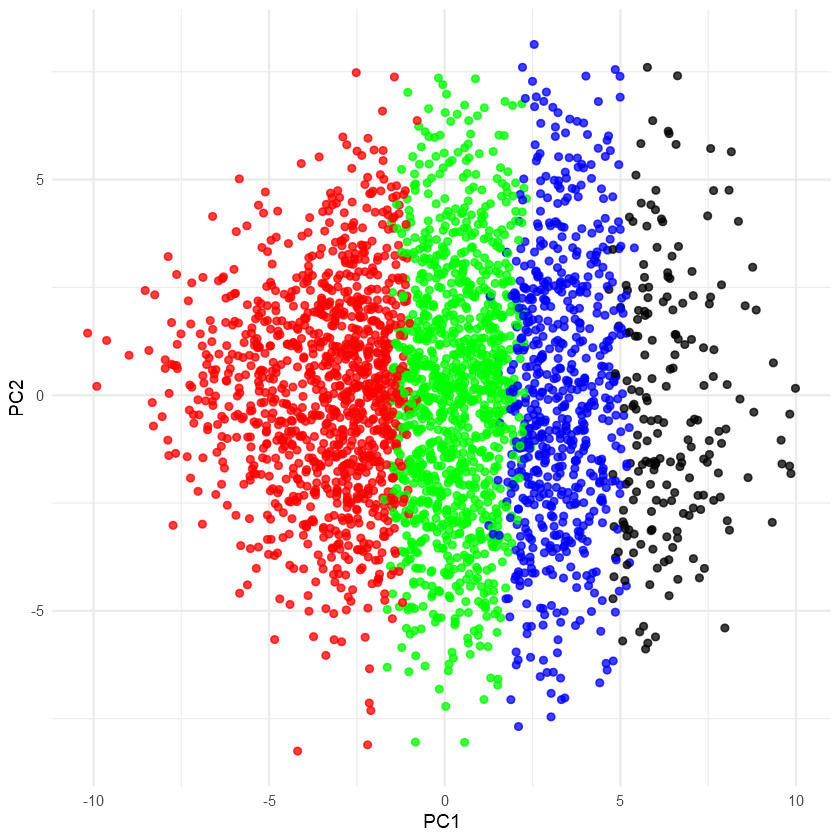

In [24]:
# graph the results using PCA
ggplot(data=as.data.frame(p.comp$x), aes(x = PC1, y = PC2)) + 
        geom_point(color = rgb(post), alpha=0.75) + theme_minimal()

We can see that each class is mostly contained within their own area, but there are instances it goes into another area dominated by another class.
In addition, Result 2 (Blue) and 3 (Black) are very close to each other, nearly mixing into each other. This class inbalance may pose problems of classification later on.

<h1>Visual Representation for quantitative data: Boxplots and Histograms </h1>

The next step is to produce visual representation of the distribution of the quantitative variables.

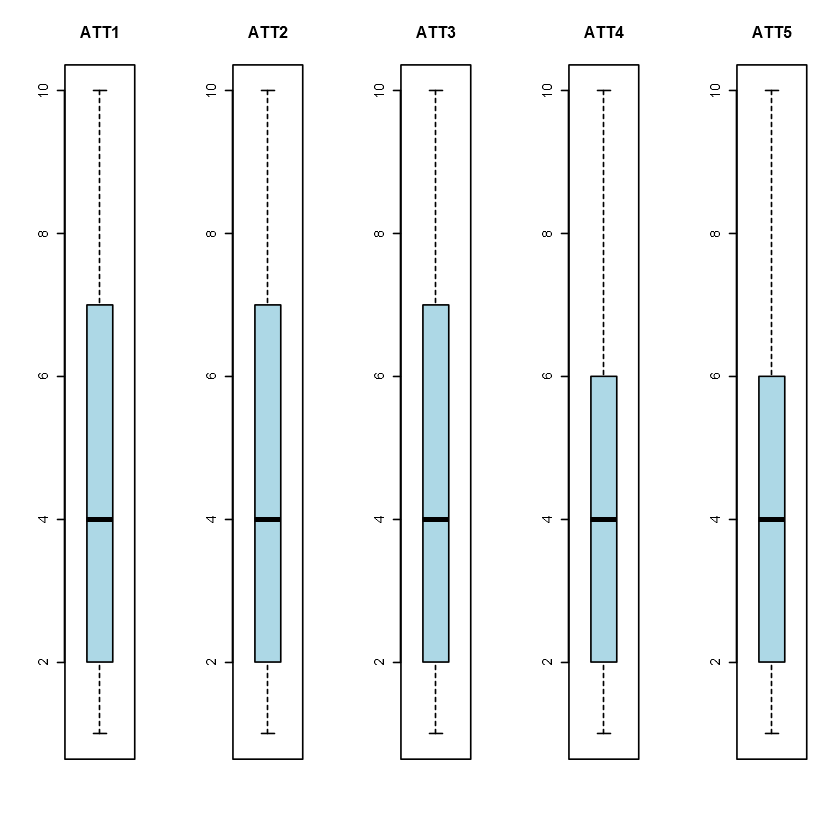

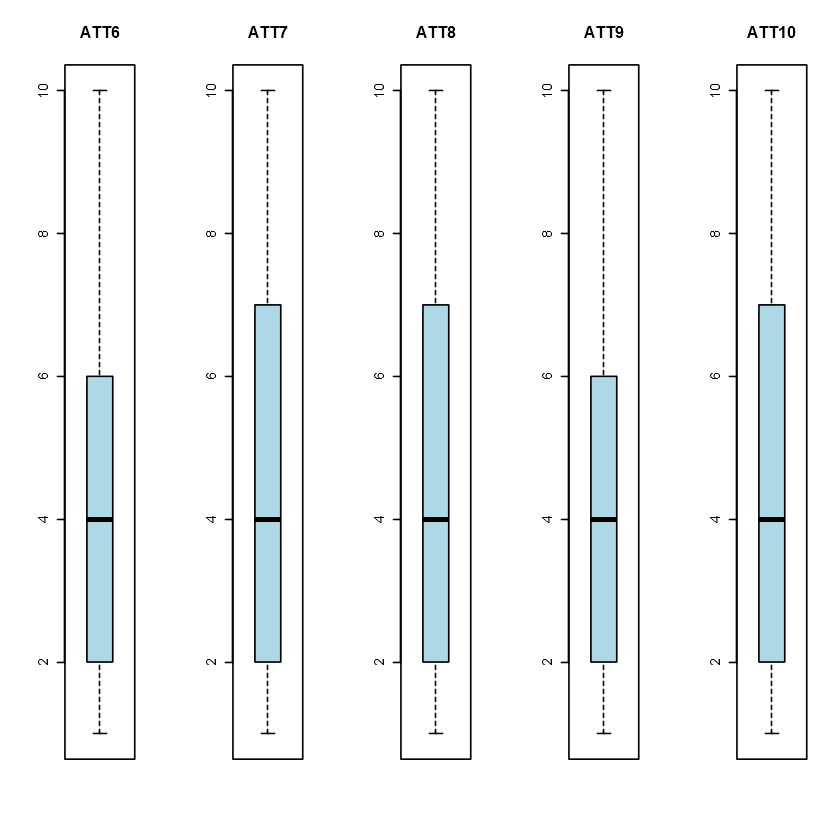

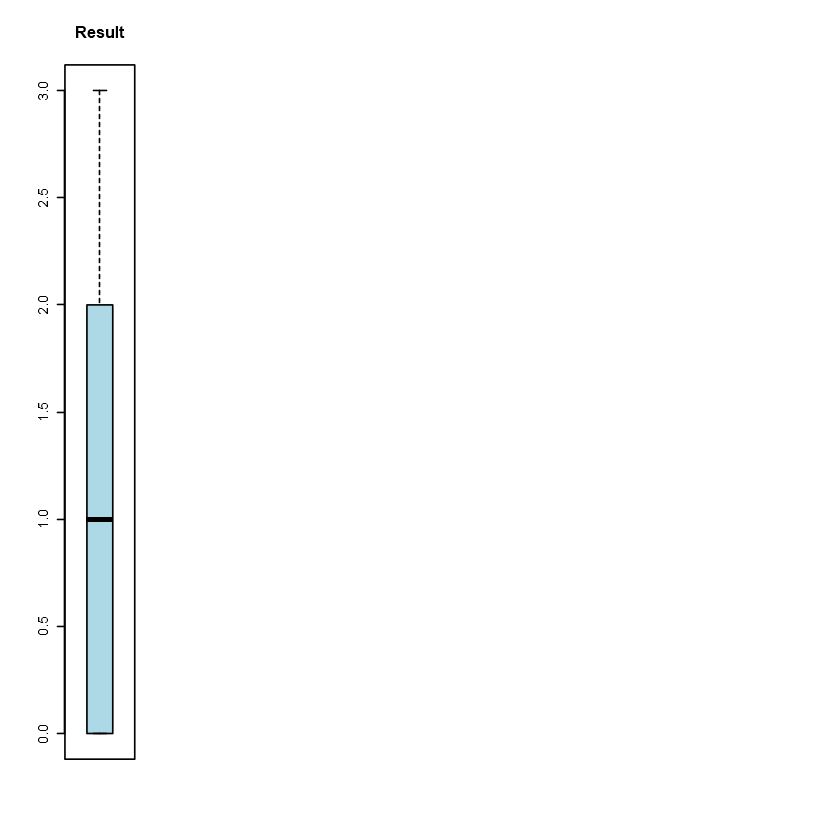

In [25]:
par(mfrow = c(1,5)) # display boxplots in a 1 x 5 grid
# for each numerical variable plot a boxplot
for (i in 1:11) {
        boxplot(df.completecase[,i], main = names(df.completecase[i]), type="l", col = 'lightblue')
}

The variables seem to be distributed well but we should plot histograms to understand the distribution more clearly.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


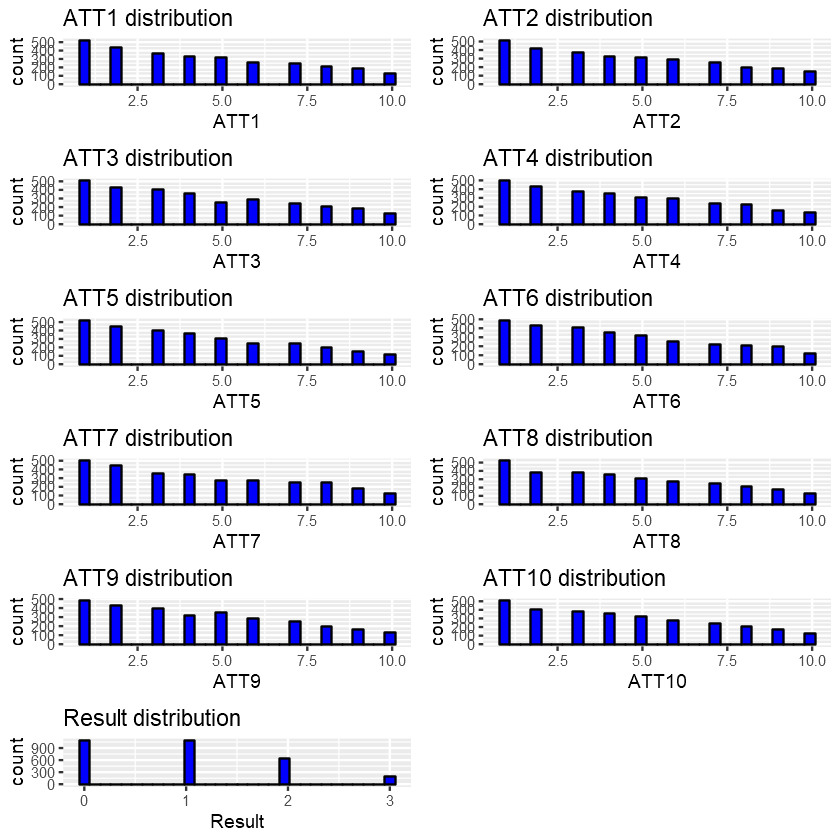

In [26]:
#ATT1 histogram
p1<-ggplot(df.completecase,aes(x = ATT1)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT1 distribution')

#ATT2 histogram
p2<-ggplot(df.completecase,aes(x = ATT2)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT2 distribution')

#ATT3 histogram
p3<-ggplot(df.completecase,aes(x = ATT3)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT3 distribution')

#ATT4 histogram
p4<-ggplot(df.completecase,aes(x = ATT4)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT4 distribution')

#ATT5 histogram
p5<-ggplot(df.completecase,aes(x = ATT5)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT5 distribution')

#ATT6 histogram
p6<-ggplot(df.completecase,aes(x = ATT6)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT6 distribution')

#ATT7 histogram
p7<-ggplot(df.completecase,aes(x = ATT7)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT7 distribution')

#ATT8 histogram
p8<-ggplot(df.completecase,aes(x = ATT8)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT8 distribution')

#ATT9 histogram
p9<-ggplot(df.completecase,aes(x = ATT9)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT9 distribution')

#ATT10 histogram
p10<-ggplot(df.completecase,aes(x = ATT10)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('ATT10 distribution')

#Result histogram
p11<-ggplot(df.completecase,aes(x = Result)) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('Result distribution')

# plot all 6 graphs, 3 x 2 grid
grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, ncol = 2)

From the histogram, we do not see a normal distribution in any 10 attributes. Overall, there is a slow declining trend as you move along the x-axis.

<h1>Association between variables: Correlation matrix</h1>

We can use [cor()](https://www.rdocumentation.org/packages/stats/versions/3.4.1/topics/cor) function to find the pearson correlation coefficient between numeric variables. 

In [27]:
round(cor(df.completecase[-c(1)]),3) #pearson correlation by default  

,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
ATT2,1.000,0.067,0.062,0.032,0.039,0.011,0.030,0.094,0.073,0.351
ATT3,0.067,1.000,0.047,0.065,0.040,0.031,0.026,0.060,0.085,0.365
ATT4,0.062,0.047,1.000,0.080,0.045,0.059,0.021,0.028,0.083,0.360
ATT5,0.032,0.065,0.080,1.000,0.050,0.071,0.029,0.084,0.084,0.374
ATT6,0.039,0.040,0.045,0.050,1.000,0.023,0.041,0.067,0.063,0.334
ATT7,0.011,0.031,0.059,0.071,0.023,1.000,0.078,0.037,0.067,0.341
ATT8,0.030,0.026,0.021,0.029,0.041,0.078,1.000,0.043,0.034,0.327
ATT9,0.094,0.060,0.028,0.084,0.067,0.037,0.043,1.000,0.012,0.350
ATT10,0.073,0.085,0.083,0.084,0.063,0.067,0.034,0.012,1.000,0.373
Result,0.351,0.365,0.360,0.374,0.334,0.341,0.327,0.350,0.373,1.000


From above, we see very small correlation between any of the independent variables. Only variable Result between other independent variables have a weak linear correlation. We can visualize these correlations with a scatter graph.

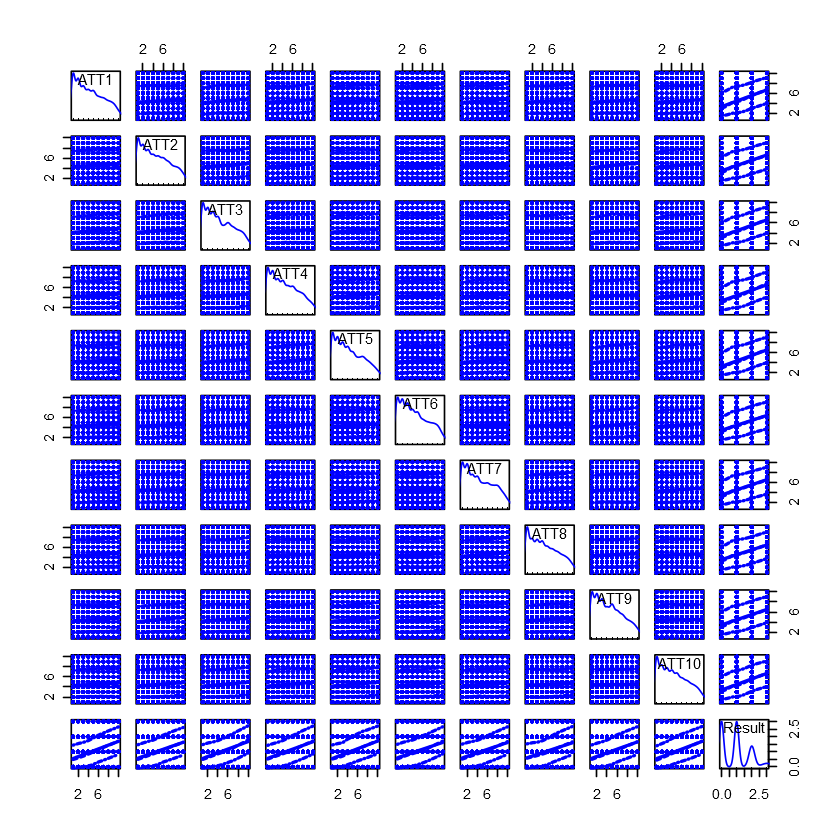

In [28]:
scatterplotMatrix(~ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + ATT8 + ATT9 + ATT10 + Result, df.completecase,cex=0.2)

The scatter graph confirms our correlation matrix, in which the data has no linear relationship between any independent variables which imply no multicollinearity. However, each independent variable has a linear relationship with the result variable.

Since most of the attribute variables are not linearly correlated with each other, we can use regression tree as an imputation method. 

We can use a regression tree to make predictions on those missing values due to its advantages such as:

- Does not require any statistical assumptions.
- Can operate on a non-linear and complex relationship between predictors and response variable.

In [29]:
#convert Results variable into a factor type
df.completecase$Result <- factor(df.completecase$Result)

The random forest function from [randomForest](https://cran.r-project.org/web/packages/randomForest/randomForest.pdf) package produces an ensemble of trees to make a prediction of the response variable. Although bootstrap aggregation of trees is a special version of random forest, random forest improves upon bagged trees by decorrelating the generated trees.

The randomForest function operates by:
- Training set for the current tree is drawn by sampling with replacement, about one-third of the cases are left out of the sample. This oob (out-of-bag) data is used to get a running unbiased estimate of the regression error as trees are added to the forest. The predicted values of the input data is based on out-of-bag samples.

mtry = 3  OOB error = 22.89% 
Searching left ...
mtry = 2 	OOB error = 22.99% 
-0.004373178 5e-04 
Searching right ...
mtry = 4 	OOB error = 22.96% 
-0.002915452 5e-04 


,mtry,OOBError
2.OOB,2,0.2298966
3.OOB,3,0.2288956
4.OOB,4,0.2295629


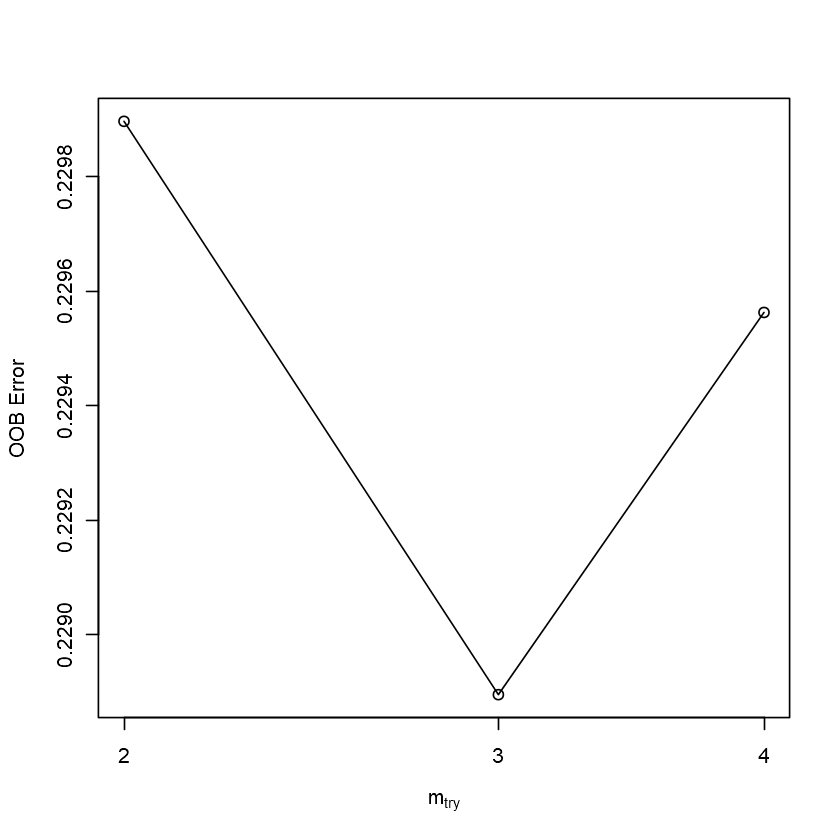

In [30]:
# tuning mtry
tuneRF(x = subset(df.completecase, select = -Result), y = df.completecase$Result, stepFactor=1.5, improve=0.0005, ntreeTry = 500)

In [31]:
#generate a random forest model that predicts attribute 1
forest_att1 <- randomForest(ATT1 ~ ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + 
                            ATT8 + ATT9 + ATT10, data = df.completecase, mtry = 3, ntree = 500, importance = TRUE)
forest_att1 #output the model


Call:
 randomForest(formula = ATT1 ~ ATT2 + ATT3 + ATT4 + ATT5 + ATT6 +      ATT7 + ATT8 + ATT9 + ATT10, data = df.completecase, mtry = 3,      ntree = 500, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 7.515902
                    % Var explained: -1.53

In [32]:
#look at which variable is important to the model
importance(forest_att1)

,%IncMSE,IncNodePurity
ATT2,-0.6564907,2097.215
ATT3,3.6263153,2070.286
ATT4,-0.9501110,2199.622
ATT5,1.8264430,2190.215
ATT6,2.2500098,2163.094
ATT7,0.7402098,2096.723
ATT8,0.9554731,2168.780
ATT9,-1.0124184,2154.403
ATT10,1.0970466,2125.817


In [33]:
#calculate rmse on random forest 
rmse(round(forest_att1$predicted), df.completecase$ATT1)

[1] 2.750072

Random forest's % variance explained tells us it shouldn't be used for imputation as the rest of the attributes does not a good job at explaining ATT1. Therefore, we need another method to impute our missing values. 

We can use kNN (K Nearest Neighbours) to find similar datapoints to those with missing attributes, and impute them according to their neighbour's attributes.

In [34]:
# Change ? values into NA
df[df$ATT1 == "?",'ATT1'] <- NA
df[df$ATT3 == "?",'ATT3'] <- NA
df[df$ATT4 == "?",'ATT4'] <- NA
df[df$ATT5 == "?",'ATT5'] <- NA

In [35]:
# find k = 21 neighbours for each data point with missing value(s).
df <- kNN(df, variable = c('ATT1', 'ATT3', 'ATT4', 'ATT5'), k = 21)

In [36]:
# Imputation results
df[c(2,3,4),]

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result,ATT1_imp,ATT3_imp,ATT4_imp,ATT5_imp
2,9,8,9,1,1,1,1,5,6,1,1,TRUE,FALSE,FALSE,FALSE
3,10,7,5,7,5,5,2,7,1,1,2,FALSE,TRUE,FALSE,TRUE
4,3,4,3,5,2,8,4,6,7,2,1,FALSE,FALSE,TRUE,FALSE


In [37]:
# Remove the last four columns
df.imputed <- df[-c(12,13,14,15)]

In [38]:
df.imputed$ATT1 <- as.integer(as.character(df.imputed$ATT1))
df.imputed$ATT3 <- as.integer(as.character(df.imputed$ATT3))
df.imputed$ATT4 <- as.integer(as.character(df.imputed$ATT4))
df.imputed$ATT5 <- as.integer(as.character(df.imputed$ATT5))

# PCA for graphing reference
p.comp.imputed<-prcomp(df.imputed[1:10])
post <- matrix( NA, nrow=3000, ncol=4)
for (k in 1:3000){
    for (j in 1:4){
      post[k,j] <- ifelse((df.imputed$Result[k] == (j-1)),1,0)  
    }
}

df.imputed$Result <- factor(as.character(df.imputed$Result)) # convert result into factor
str(df.imputed) # recheck the structure 
round(describe(df.imputed), 3) # view more detailed statistics and round some variables up to 3 d.p

'data.frame':	3000 obs. of  11 variables:
 $ ATT1  : int  1 9 10 3 3 2 1 8 2 1 ...
 $ ATT2  : int  4 8 7 4 5 7 1 5 9 1 ...
 $ ATT3  : int  1 9 5 3 2 3 3 2 2 1 ...
 $ ATT4  : int  4 1 7 5 1 2 5 6 1 8 ...
 $ ATT5  : int  3 1 5 2 6 1 9 2 4 9 ...
 $ ATT6  : int  7 1 5 8 5 4 3 7 6 2 ...
 $ ATT7  : int  1 1 2 4 3 10 7 3 8 2 ...
 $ ATT8  : int  2 5 7 6 1 3 1 6 8 5 ...
 $ ATT9  : int  6 6 1 7 7 9 10 7 4 1 ...
 $ ATT10 : int  8 1 1 2 1 5 7 3 3 3 ...
 $ Result: Factor w/ 4 levels "0","1","2","3": 1 2 3 2 1 2 2 2 2 1 ...


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ATT1,1,3000,4.426,2.723,4,4.231,2.965,1,10,9,0.429,-0.962,0.050
ATT2,2,3000,4.501,2.748,4,4.315,2.965,1,10,9,0.402,-0.980,0.050
ATT3,3,3000,4.422,2.713,4,4.228,2.965,1,10,9,0.434,-0.964,0.050
ATT4,4,3000,4.440,2.693,4,4.252,2.965,1,10,9,0.419,-0.934,0.049
ATT5,5,3000,4.326,2.668,4,4.122,2.965,1,10,9,0.481,-0.876,0.049
ATT6,6,3000,4.431,2.694,4,4.240,2.965,1,10,9,0.446,-0.930,0.049
ATT7,7,3000,4.479,2.741,4,4.297,2.965,1,10,9,0.393,-1.035,0.050
ATT8,8,3000,4.478,2.720,4,4.292,2.965,1,10,9,0.398,-0.962,0.050
ATT9,9,3000,4.446,2.678,4,4.254,2.965,1,10,9,0.428,-0.901,0.049
ATT10,10,3000,4.459,2.698,4,4.271,2.965,1,10,9,0.409,-0.940,0.049


# 2. Build a classifier

Our response variable has 4 classes:

- Result 0 as curable
- Result 1 as tumour stage
- Result 2 as node stage
- Result 3 as incurable

We need to use a multiclass classification model. Here are the following models used:
- Linear and Quadratic Discriminant Analysis
- Multinomial Logistic Regression
- Random Forest Classifier
- Support Vector Machine (Linear and Radial)

## Reference to the real distribution

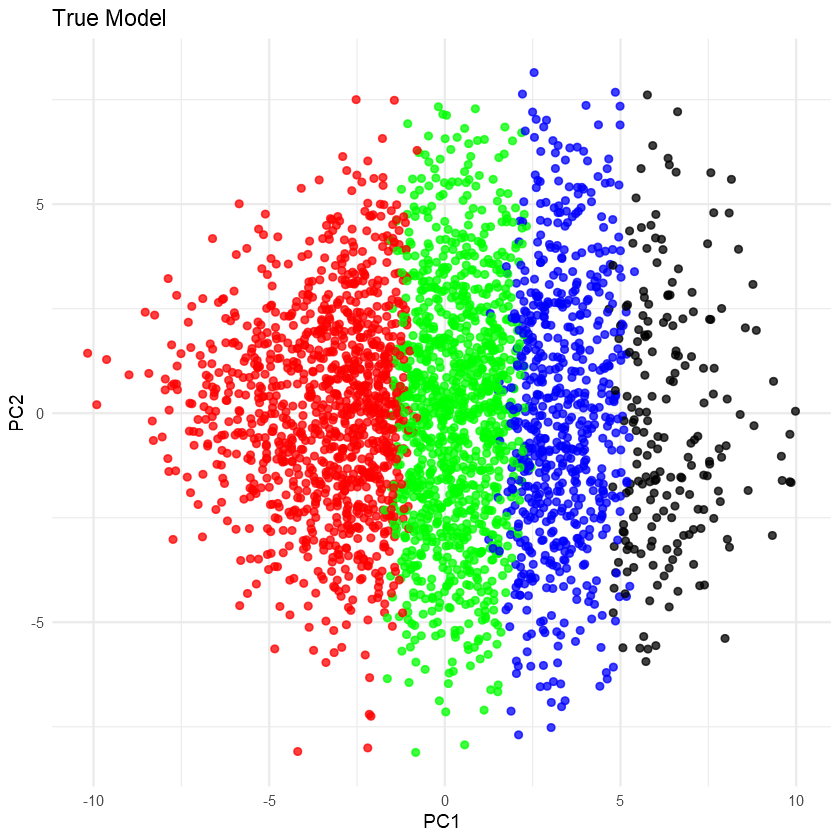

In [39]:
# Reference to True model
ggplot(data=as.data.frame(p.comp.imputed$x), aes(x = PC1, y = PC2)) + 
        geom_point(color = rgb(post), alpha=0.75)  +
        ggtitle ("True Model") + theme_minimal()

## Training and Test Data

Each model will be trained using the training dataset, while testing will be on the test dataset.

In [40]:
# 50% split into train and 50% test dataset
# To ensure training and test set have equal number of classes, separate data in terms of class then sample
df.imputed.zero <- df.imputed[df.imputed$Result == 0,]
df.imputed.one <- df.imputed[df.imputed$Result == 1,]
df.imputed.two <- df.imputed[df.imputed$Result == 2,]
df.imputed.three <- df.imputed[df.imputed$Result == 3,]

# Sample from data when result = 0
indx <- sample(1:nrow(df.imputed.zero),nrow(df.imputed.zero)/2, replace=FALSE) #sample 50% of data
df.imputed.train <- df.imputed.zero[indx,] #generate training set
df.imputed.test <- df.imputed.zero[-indx,] #generate test set

# Sample from data when result = 1
indx <- sample(1:nrow(df.imputed.one),nrow(df.imputed.one)/2, replace=FALSE) #sample 50% of data
df.imputed.train <- rbind(df.imputed.one[indx,],df.imputed.train) #combine with previous training set
df.imputed.test <- rbind(df.imputed.one[-indx,],df.imputed.test) #combine with previous test set

# Sample from data when result = 2
indx <- sample(1:nrow(df.imputed.two),nrow(df.imputed.two)/2, replace=FALSE) #sample 50% of data
df.imputed.train <- rbind(df.imputed.two[indx,],df.imputed.train) #combine with previous training set
df.imputed.test <- rbind(df.imputed.two[-indx,],df.imputed.test) #combine with previous test set

# Sample from data when result = 3
indx <- sample(1:nrow(df.imputed.three),nrow(df.imputed.three)/2, replace=FALSE) #sample 50% of data
df.imputed.train <- rbind(df.imputed.three[indx,],df.imputed.train) #combine with previous training set
df.imputed.test <- rbind(df.imputed.three[-indx,],df.imputed.test) #combine with previous test set


<h1>Linear Discriminant Analysis (LDA) </h1>

We can use linear discriminant analysis as it is a popular multi-class classification model. If the classes are well separated the parameter estimates are stable. Otherwise, a logistic regression should be used. Although the classes do not seem to be perfectly separated as seen from the visualization, we can see how well LDA performs in sight of these problems to be compared with other methods.

Assumptions:
- Gaussian distributions of classes
- Classes have a common covariance matrix (however, from the plotted distribution this assumption may be violated).

I have used lda function from [MASS](https://cran.r-project.org/web/packages/MASS/MASS.pdf) package. It will build a model with cross validation by setting CV=TRUE to get predictions of class membership that are derived from leave-one-out cross-validation.

In [41]:
fit.lda = lda(Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + ATT8 + ATT9 + ATT10, 
              data = df.imputed, CV = TRUE)

Now we can evaluate the classification with leave-one-out cross-validation against the true labels. 

In [42]:
# table the results into proportion
tab.lda <- table(df.imputed$Result, fit.lda$class)
lda.CV <- rbind(tab.lda[1, ]/sum(tab.lda[1, ]), tab.lda[2, ]/sum(tab.lda[2, ]),
                tab.lda[3, ]/sum(tab.lda[3, ]), tab.lda[4, ]/sum(tab.lda[4, ]))

#add row and column names
dimnames(lda.CV)<- list(Actual = c("curable", "tumour","node","incurable"), 
                  "Predicted (cv)" = c("curable", "tumour","node","incurable")) 
#print table
print(round(lda.CV, 3))

           Predicted (cv)
Actual      curable tumour  node incurable
  curable     0.914  0.086 0.000     0.000
  tumour      0.000  0.996 0.004     0.000
  node        0.000  0.050 0.950     0.000
  incurable   0.000  0.000 0.189     0.811


From the table above, we can see a large proportion of misclassification of result 3 (incurable) compared to the others. It incorrectly predicts it as result 2 (node) since these two classes are very similar as seen in the visualization.

We should use AUC score to evaluate model prediction that accounts for different threshold, which provides a better evaluation criteria than accuracy.

In [43]:
multiclass.roc(df.imputed$Result, as.integer(fit.lda$class) ,levels=base::levels(df.imputed$Result), percent=FALSE)


Call:
multiclass.roc.default(response = df.imputed$Result, predictor = as.integer(fit.lda$class),     levels = base::levels(df.imputed$Result), percent = FALSE)

Data: as.integer(fit.lda$class) with 4 levels of df.imputed$Result: 0, 1, 2, 3.
Multi-class area under the curve: 0.973

In [44]:
# To be used for plotting predicted results
post.lda <- matrix( NA, nrow=3000, ncol=4)
for (k in 1:3000){
    for (j in 1:4){
      post.lda[k,j] <- ifelse((fit.lda$class[k] == (j)),1,0)  
    }
}

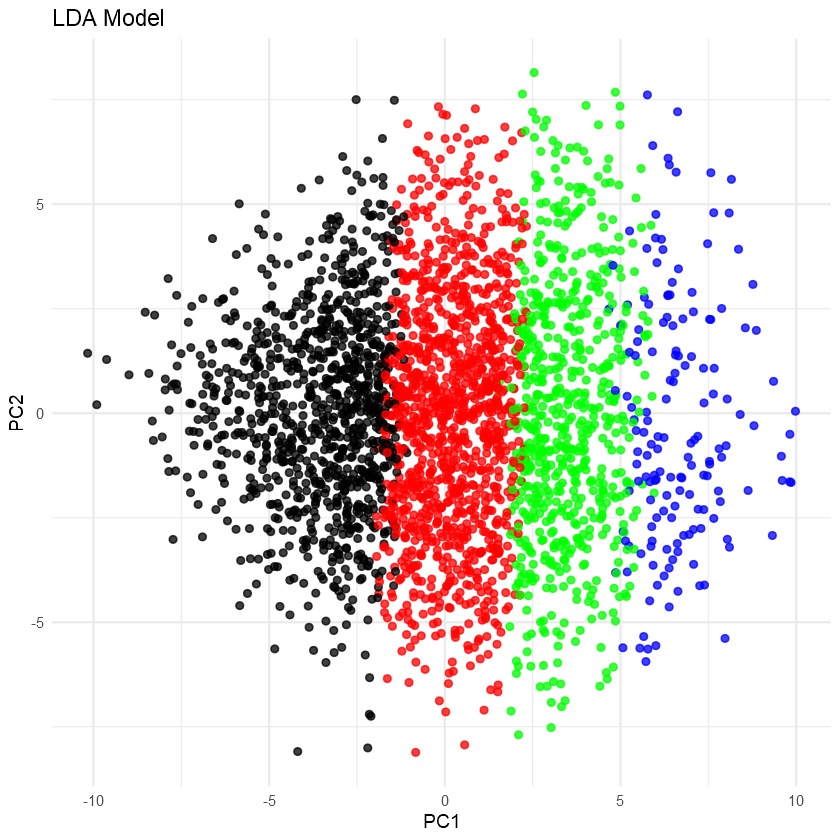

In [45]:
# plot the predicted results
ggplot(data=as.data.frame(p.comp.imputed$x),aes(x=PC1, y=PC2)) + 
geom_point(color = rgb(post.lda), alpha=0.75)+
ggtitle("LDA Model") + theme_minimal()

The AUC score is a healthy 0.973 and the graph shows it manages to classifiy most of the observations correctly. However, the classes may prove to be hard to classify as it is not linearly separatable. In addition, the assumption of classes having a common covariance matrix may be violated.

<h1>Quadratic Discriminant Analysis (QDA) </h1>

We made an assumption that our classes are linearly separatable decision boundary. However, we do not know if non-linear decision boundaries perform better. QDA uses a non-linear (quadratic) separable decision boundary which may be a better candidate than LDA.

Another difference is that QDA's class can has a different covariance matrix.

QDA function performs similarly to LDA function from above.

In [46]:
fit.qda = qda(Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + ATT8 + ATT9 + ATT10, 
              data = df.imputed, CV = TRUE)

Now we can evaluate the classification with leave-one-out cross-validation against the true labels. 

In [47]:
# table the proportions
tab.qda <- table(df.imputed$Result, fit.qda$class)
qda.CV <- rbind(tab.qda[1, ]/sum(tab.qda[1, ]), tab.qda[2, ]/sum(tab.qda[2, ]), tab.qda[3, ]/sum(tab.qda[3, ]),
                tab.qda[4, ]/sum(tab.qda[4, ]))

#label the row and columns
dimnames(qda.CV)<- list(Actual = c("curable", "tumour","node","incurable"), 
                  "Predicted (cv)" = c("curable", "tumour","node","incurable"))
#print table
print(round(qda.CV, 3))

           Predicted (cv)
Actual      curable tumour  node incurable
  curable      0.97  0.030 0.000     0.000
  tumour       0.02  0.970 0.009     0.000
  node         0.00  0.023 0.969     0.008
  incurable    0.00  0.000 0.031     0.969


From the results above, the predicted accuracy for all classes are around 97%, which is an increase in accuracy from LDA's results.

In [48]:
multiclass.roc(df.imputed$Result, as.integer(fit.qda$class) ,levels=base::levels(df.imputed$Result), percent=FALSE)


Call:
multiclass.roc.default(response = df.imputed$Result, predictor = as.integer(fit.qda$class),     levels = base::levels(df.imputed$Result), percent = FALSE)

Data: as.integer(fit.qda$class) with 4 levels of df.imputed$Result: 0, 1, 2, 3.
Multi-class area under the curve: 0.9899

In [49]:
# To be used for plotting predicted results
post.qda <- matrix( NA, nrow=3000, ncol=4)
for (k in 1:3000){
    for (j in 1:4){
      post.qda[k,j] <- ifelse((fit.lda$class[k] == (j)),1,0)  
    }
}

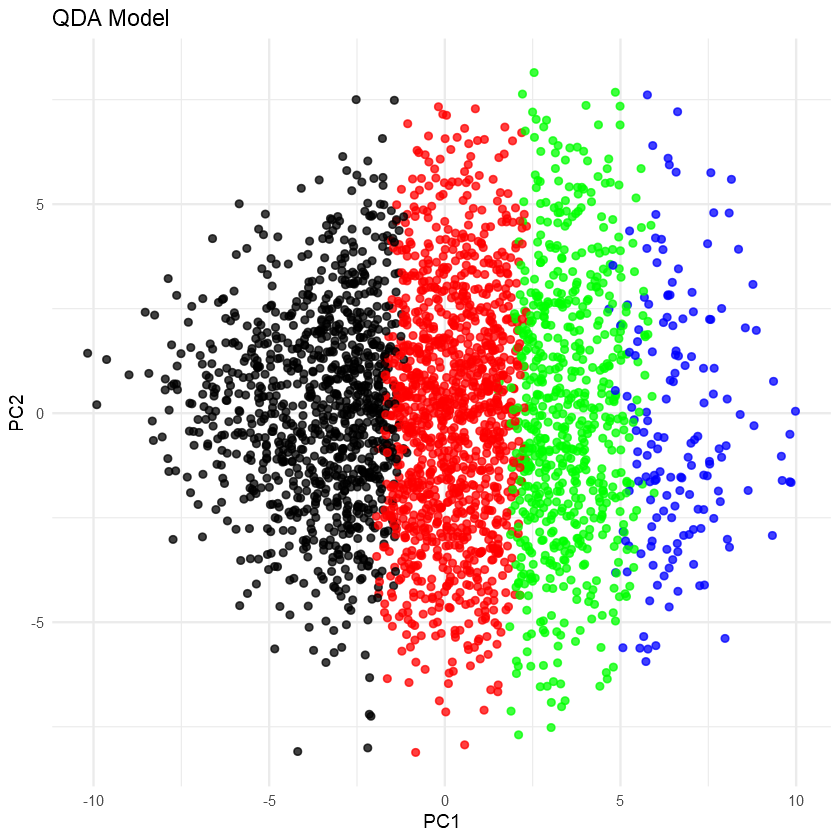

In [50]:
# plot the predicted results
ggplot(data=as.data.frame(p.comp.imputed$x),aes(x=PC1, y=PC2)) + 
geom_point(color = rgb(post.qda), alpha=0.75)+
ggtitle("QDA Model") + theme_minimal()

The AUC score has improved to 0.9899, which is an improvement to LDA. 

<h1>Multinomial Logistic Regression</h1>

We saw from LDA's classification that suggets the classes do not seem to be well separated. In addition, we have assumed the classes have a normal distribution. Violation of this assumption may bias the model's parameters. Therefore, we can use Multinomial Logisitic regression as it requires less assumptions and work better than LDA when classes are not well seperated.

In [51]:
#create matrix of test data
test.xmat <- model.matrix(Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + ATT8 + ATT9 + ATT10, 
                           data = df.imputed.test, family = 'multinomial')[,-1]

In [52]:
#create matrix of train data
train.xmat <- model.matrix(Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + ATT8 + ATT9 + ATT10, 
                           data = df.imputed.train, family = 'multinomial')[,-1]

In [53]:
# Multinomial Logisitic regression
# cross-validation lasso regularization
# find the best lambda parameter
multilogit.cvfit <- cv.glmnet(train.xmat, df.imputed.train$Result, family="multinomial", alpha = 1)

Warning message:
"from glmnet Fortran code (error code -99); Convergence for 99th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"

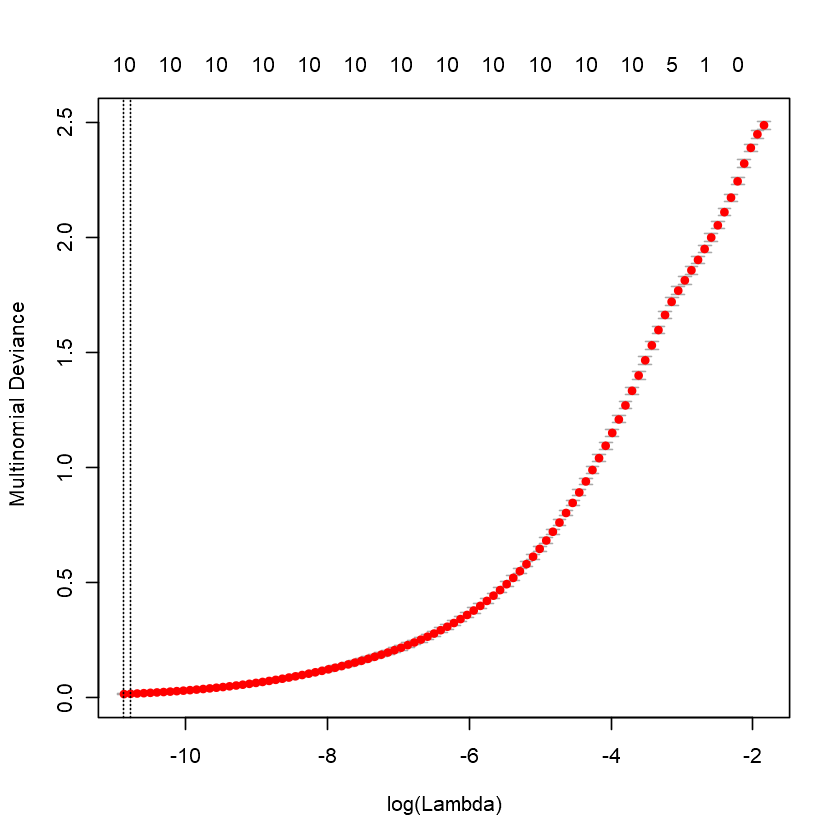

In [54]:
plot(multilogit.cvfit)

In [55]:
# cross-validation to find best lamda for lasso regularization
bestlam.lasso <- multilogit.cvfit$lambda.min

In [56]:
# make predictions on test set
multi.pred <- as.vector(as.integer(predict(multilogit.cvfit, test.xmat, s = bestlam.lasso, type = "class")))

In [57]:
# table the proportions
tab.multi <- table(df.imputed.test$Result, multi.pred)
multi.CV <- rbind(tab.multi[1, ]/sum(tab.multi[1, ]), tab.multi[2, ]/sum(tab.multi[2, ]), tab.multi[3, ]/sum(tab.multi[3, ]),
                tab.multi[4, ]/sum(tab.multi[4, ]))

#label the row and columns
dimnames(multi.CV)<- list(Actual = c("curable", "tumour","node","incurable"), 
                  "Predicted (cv)" = c("curable", "tumour","node","incurable"))
# print table
print(round(multi.CV, 3))

           Predicted (cv)
Actual      curable tumour  node incurable
  curable         1  0.000 0.000         0
  tumour          0  1.000 0.000         0
  node            0  0.003 0.997         0
  incurable       0  0.000 0.000         1


From the table above, we can see multinomial logistic regression is able to better predict 3 classes compared to LDA and QDA. However, it misclassifies result 2. 

In [58]:
multiclass.roc(df.imputed.test$Result, multi.pred, levels=base::levels(df.imputed.test$Result), percent=TRUE)


Call:
multiclass.roc.default(response = df.imputed.test$Result, predictor = multi.pred,     levels = base::levels(df.imputed.test$Result), percent = TRUE)

Data: multi.pred with 4 levels of df.imputed.test$Result: 0, 1, 2, 3.
Multi-class area under the curve: 99.97%

The AUC score is 99.9%, which is a slight improvement upon QDA. This backs up the notion that the classes are not well separated, where multinominal logisitic model is able to perform better than LDA.

Note: The graph is not plotted since the PCA does not show the same shape previously shown due to sampling a portion of the original data.

<h1>Random Forest</h1>

Random Forest can also be used as a classification model instead of a regression model that was used in missing value imputation. The advantages and disadvantages of random forest regression also applies to the classifier model. Random forest provides an alternative to LDA, QDA and Multinominal logistic regression as it segments the predictor space into a number of simple regions, which works well with non-linear and complex relationship between the features.

mtry = 3  OOB error = 22.47% 
Searching left ...
mtry = 2 	OOB error = 22.4% 
0.002967359 5e-04 
Searching right ...
mtry = 4 	OOB error = 23.1% 
-0.03125 5e-04 


,mtry,OOBError
2.OOB,2,0.2240000
3.OOB,3,0.2246667
4.OOB,4,0.2310000


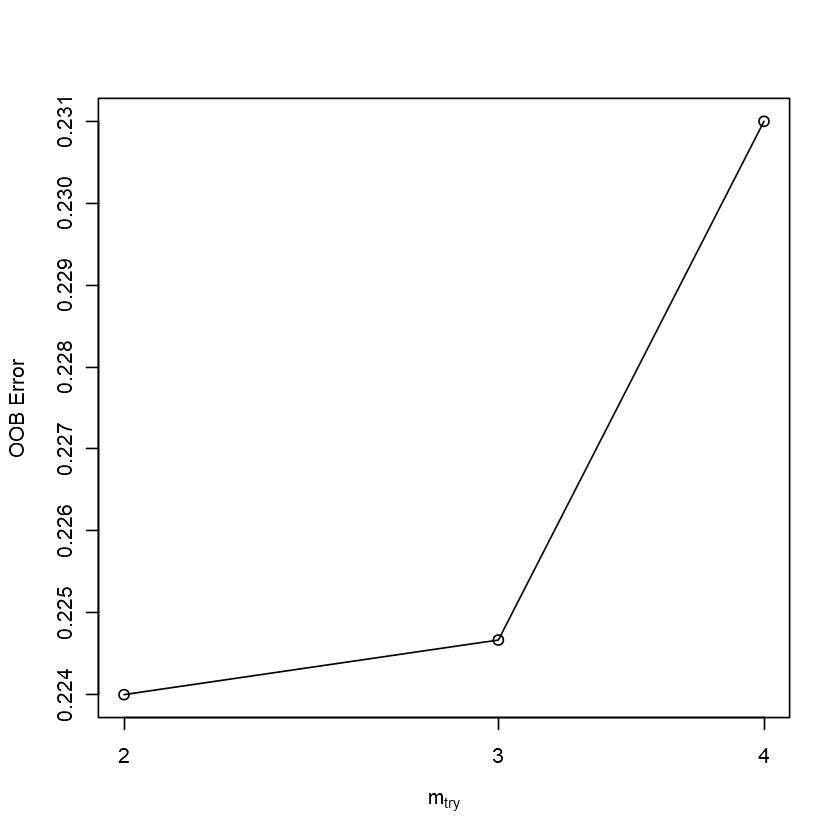

In [59]:
# tuning mtry
tuneRF(x = subset(df.imputed, select = -Result), y = df.imputed$Result, stepFactor=1.5, improve=0.0005, ntreeTry = 500)

In [60]:
#generate a random forest model
rf.fit <- randomForest(Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + 
                            ATT8 + ATT9 + ATT10, data = df.imputed, mtry = 3, ntree = 500, importance = TRUE)
rf.fit #output the model


Call:
 randomForest(formula = Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 +      ATT6 + ATT7 + ATT8 + ATT9 + ATT10, data = df.imputed, mtry = 3,      ntree = 500, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 21.93%
Confusion matrix:
    0   1   2  3 class.error
0 974 108   0  0  0.09981516
1 117 927  36  0  0.14166667
2   0 248 392  2  0.38940810
3   0   5 142 49  0.75000000

The random forest function uses out-of-bag error estimation. It shows a 23.3% error rate with the fitted model. Most of the errors are attributed to the classification of result 3, and and result 2 which is expected.

In [61]:
#look at which variable is important to the model
importance(rf.fit)

,0,1,2,3,MeanDecreaseAccuracy,MeanDecreaseGini
ATT1,52.03696,28.98168,35.53722,24.19231,68.46188,211.1519
ATT2,50.30591,30.31312,30.55260,19.82993,62.07508,210.4413
ATT3,44.14213,28.07866,31.21282,20.98753,58.72151,207.4657
ATT4,45.83750,25.16256,27.61384,29.17103,58.99157,200.6418
ATT5,47.53002,25.90689,30.27963,28.54690,60.47758,206.8456
ATT6,42.31421,23.43277,29.41838,14.26522,52.44135,200.2513
ATT7,46.01333,27.13788,22.13915,16.77266,53.83230,205.4818
ATT8,48.21099,27.12563,21.65626,24.78841,56.66663,208.4826
ATT9,46.45467,26.49015,24.58189,23.72740,57.23624,206.7285
ATT10,45.41543,26.22528,37.47281,18.53396,59.07008,210.5967


From the table above, ATT1 slightly stands out as the important atttribute in the model, but other variables plays a role in the model.

In [62]:
multiclass.roc(df.imputed$Result, as.vector(as.integer(rf.fit$predicted)),
               levels=base::levels(df.imputed$Result), percent=TRUE)


Call:
multiclass.roc.default(response = df.imputed$Result, predictor = as.vector(as.integer(rf.fit$predicted)),     levels = base::levels(df.imputed$Result), percent = TRUE)

Data: as.vector(as.integer(rf.fit$predicted)) with 4 levels of df.imputed$Result: 0, 1, 2, 3.
Multi-class area under the curve: 90.33%

In [63]:
# To be used for plotting predicted results
post.rf <- matrix( NA, nrow=3000, ncol=4)
for (k in 1:3000){
    for (j in 1:4){
      post.rf[k,j] <- ifelse((rf.fit$predicted[k] == (j)),1,0)  
    }
}

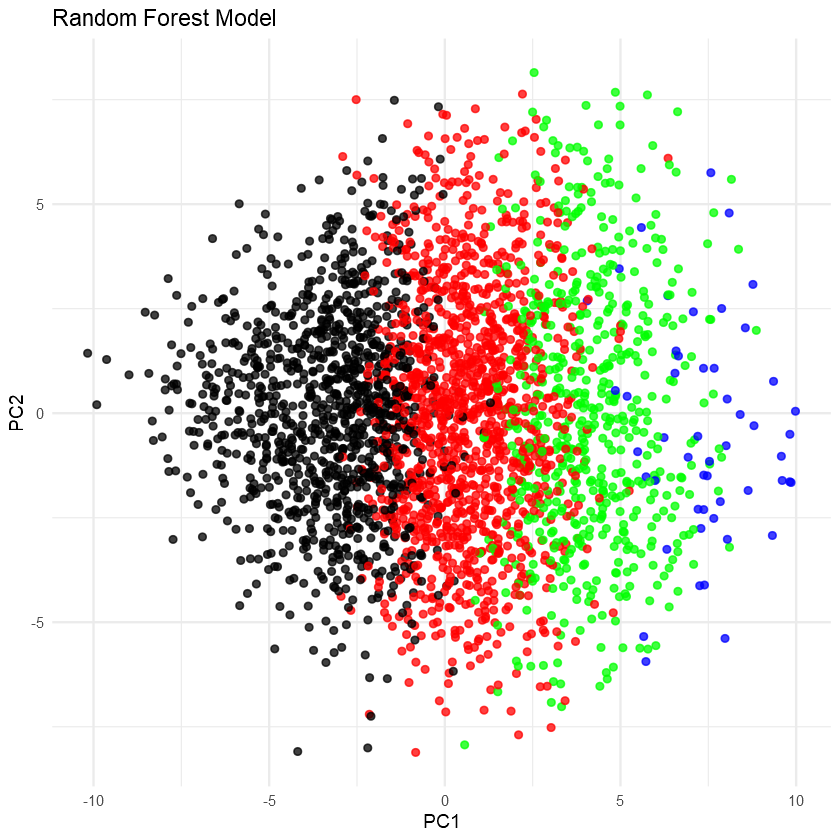

In [64]:
# plot the predicted results
ggplot(data=as.data.frame(p.comp.imputed$x),aes(x=PC1, y=PC2)) + 
geom_point(color = rgb(post.rf), alpha=0.75)+
ggtitle("Random Forest Model") + theme_minimal()

The AUC score is a decent 90.46% and the graph shows it manages to classifiy most of the observations correctly. However, its performance is a bit lacking compared to the earlier models. We can see result 3 proves to be hardest to classify as it mostly classifies it as result 2.

This tells us random forest regressions does not perform well on the data, where it segments the predictor space into a number of simple regions. Using a simple linear decision boundary is better. 

<h1>Support Vector Machine</h1>

Support Vector Machine is a classification method that can apply linear or non-linear decision boundaries. I have used package [e1071](https://cran.r-project.org/web/packages/e1071/index.html). It relies on less assumptions on the data compared to other methods such as LDA. In addition to linear decision boundaries, we can use a radial kernal that can encapsulate similar classes within a gaussian/radial decision boundary. We can see if a non-linear (radial) decision boundary perform better than a linear one.

In [65]:
# Use cross validation to find the best cost parameter (the price of the misclassification)
# Use Radial decision boundary
tune.out <- tune(svm, Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + 
                            ATT8 + ATT9 + ATT10, data = df.imputed.train, kernel = "radial", 
                 ranges = list(cost = c(10^seq(-2, 1, by = 0.25)), gamma=c(0.005,0.01,0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10 0.005

- best performance: 0.026 

- Detailed performance results:
          cost gamma      error  dispersion
1   0.01000000 0.005 0.67200000 0.028768982
2   0.01778279 0.005 0.67200000 0.028768982
3   0.03162278 0.005 0.67200000 0.028768982
4   0.05623413 0.005 0.57933333 0.100244146
5   0.10000000 0.005 0.45133333 0.046512974
6   0.17782794 0.005 0.36200000 0.050581800
7   0.31622777 0.005 0.25666667 0.042774170
8   0.56234133 0.005 0.13866667 0.025298221
9   1.00000000 0.005 0.10866667 0.026675924
10  1.77827941 0.005 0.07933333 0.020233208
11  3.16227766 0.005 0.04933333 0.016390301
12  5.62341325 0.005 0.04200000 0.013351839
13 10.00000000 0.005 0.02600000 0.011946382
14  0.01000000 0.010 0.67200000 0.028768982
15  0.01778279 0.010 0.67200000 0.028768982
16  0.03162278 0.010 0.55000000 0.112929564
17  0.05623413 0.010 0.45000000 0.043347576
18  0.10000000 0.010 0.364666

From the cross-validation approach, it suggest a cost value of 10 and gamma of 0.01 should be used in the model.

In [66]:
# fit the model with the best cost parameter
svm.fit <- svm(Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + 
                            ATT8 + ATT9 + ATT10, df.imputed.train, kernel = "radial", cost = tune.out$best.parameter$cost,
              gamma = tune.out$best.parameter$gamma)
# output a summary
summary(svm.fit)

# make a prediction on test dataset
svm.pred <- as.numeric(predict(svm.fit, df.imputed.test))


Call:
svm(formula = Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + 
    ATT7 + ATT8 + ATT9 + ATT10, data = df.imputed.train, kernel = "radial", 
    cost = tune.out$best.parameter$cost, gamma = tune.out$best.parameter$gamma)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.005 

Number of Support Vectors:  627

 ( 58 182 258 129 )


Number of Classes:  4 

Levels: 
 0 1 2 3




In [67]:
multiclass.roc(df.imputed.test$Result, as.vector(as.integer(svm.pred)),
               levels=base::levels(df.imputed.test$Result), percent=TRUE)


Call:
multiclass.roc.default(response = df.imputed.test$Result, predictor = as.vector(as.integer(svm.pred)),     levels = base::levels(df.imputed.test$Result), percent = TRUE)

Data: as.vector(as.integer(svm.pred)) with 4 levels of df.imputed.test$Result: 0, 1, 2, 3.
Multi-class area under the curve: 98.37%

From the prediction results, the model performs slight better in predicting the test data compared to LDA.

In [68]:
#Use cross validation to find the best cost parameter (the price of the misclassification)
# Use Linear decision boundary
tune.out <- tune(svm, Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + 
                            ATT8 + ATT9 + ATT10, data = df.imputed.train, kernel = "linear", 
                 ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 5.623413

- best performance: 0.003333333 

- Detailed performance results:
          cost       error  dispersion
1   0.01000000 0.100000000 0.031426968
2   0.01778279 0.068666667 0.024954279
3   0.03162278 0.049333333 0.021361093
4   0.05623413 0.033333333 0.015071844
5   0.10000000 0.016000000 0.007166451
6   0.17782794 0.021333333 0.011674600
7   0.31622777 0.014666667 0.011674600
8   0.56234133 0.010666667 0.008432740
9   1.00000000 0.015333333 0.008916623
10  1.77827941 0.015333333 0.009962894
11  3.16227766 0.008666667 0.007062333
12  5.62341325 0.003333333 0.004714045
13 10.00000000 0.005333333 0.005258738


In [69]:
# fit the model with the best cost parameter
svm.linear <- svm(Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + ATT7 + 
                            ATT8 + ATT9 + ATT10, kernel = "linear", data = df.imputed.train, 
                cost = tune.out$best.parameter$cost)

# output a summary
summary(svm.linear)

# make a prediction on test dataset
svm.pred <- as.numeric(predict(svm.linear, df.imputed.test))


Call:
svm(formula = Result ~ ATT1 + ATT2 + ATT3 + ATT4 + ATT5 + ATT6 + 
    ATT7 + ATT8 + ATT9 + ATT10, data = df.imputed.train, kernel = "linear", 
    cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  5.623413 
      gamma:  0.1 

Number of Support Vectors:  214

 ( 17 55 100 42 )


Number of Classes:  4 

Levels: 
 0 1 2 3




In [70]:
multiclass.roc(df.imputed.test$Result, as.vector(as.integer(svm.pred)),
               levels=base::levels(df.imputed.test$Result), percent=TRUE)


Call:
multiclass.roc.default(response = df.imputed.test$Result, predictor = as.vector(as.integer(svm.pred)),     levels = base::levels(df.imputed.test$Result), percent = TRUE)

Data: as.vector(as.integer(svm.pred)) with 4 levels of df.imputed.test$Result: 0, 1, 2, 3.
Multi-class area under the curve: 99.84%

The AUC score is the second best prediction score out of all of the models which isn't too surprising as SVM (linear) and logistic regression are similar in terms of performance.

Note: The graph is not plotted since the PCA does not show the same shape previously shown due to sampling a portion of the original data.

# Conclusion

The cancer dataset contains an imbalanced class distribution. After using PCA to reduce the dimension of the data for plotting in 2 dimension, we observe classes distribution spillover between each other's region. This signifies the classes will not be well seperated during classfication. Therefore, I have used a range of models to assess and compare performances so that the best model will be chosen.  

From the results above, here are a list of models sorted by descending test AUC score:
- Multinominal Logistic Regression
- SVM(linear)
- QDA
- SVM(radial)
- LDA
- Random Forest

Due to the nature of the data, Multinominal logistic regression reigns supreme alongside SVM (linear) which share [similar performance in practice](https://stats.stackexchange.com/questions/95340/comparing-svm-and-logistic-regression).